# Week 11 데이터 시각화: 예측적 분석 (1)

-----

# 국내 프로야구 연봉 예측

### 바로가기

- [<Step1. 탐색> 프로야구 연봉 데이터 살펴보기](#<Step1.-탐색>-프로야구-연봉-데이터-살펴보기)
    - [프로야구 연봉 데이터셋의 기본 정보]
    - [회귀 분석에 사용할 피처 살펴보기]
- [<Step2. 예측> : 투수의 연봉 예측하기](#<Step2.-예측>-:-투수의-연봉-예측하기)
    - [피처들의 단위 맞춰주기 : 피처 스케일링]
    - [피처들의 단위 맞춰주기 : one-hot-encoding]
    - [피처들의 상관관계 분석]
    - [회귀 분석 적용하기]
- [<Step3. 평가> : 예측 모델 평가하기](#<Step3.-평가>-:-예측-모델-평가하기)
    - [어떤 피처가 가장 영향력이 강한 피처일까]
    - [예측 모델의 평가]
    - [회귀 분석 예측 성능을 높이기 위한 방법 : 다중 공선성 확인]
    - [믿을만한 피처로 다시 학습하기]
- [<Step4. 시각화> : 분석 결과의 시각화](#<Step4.-시각화>-:-분석-결과의-시각화)
    - [예상 연봉과 실제 연봉 비교]

-----

In [1]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# <Step1. 탐색> 프로야구 연봉 데이터 살펴보기

### [프로야구 연봉 데이터셋의 기본 정보]

In [2]:
picher_file_path='picher_stats_2017.csv'
batter_file_path='batter_stats_2017.csv'
picher=pd.read_csv(picher_file_path)
batter=pd.read_csv(batter_file_path)

In [3]:
picher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [4]:
picher.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [5]:
print(picher.shape)

(152, 22)


-----

### `[참고 - 한글을 사용하는 그래프]`
- 파이썬에서 matplotlib 기반의 시각화 툴을 이용할 때 한글 폰트를 사용하는 방법
    - 자신의 개발환경에 설치된 폰트 확인
        - `set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist]))`
    - 한글 폰트를 설정한 뒤, 축에 적용
        - 예시 :`mpl.rc('font', family='08SeoulHangang')`
    - 한글 폰트가 없다면, http://hangeul.naver.com/2017/nanum 에서 설치

In [6]:
import matplotlib as mpl
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist])) # 현재 OS 내에 설치된 폰트를 확인합니다.

{'Agency FB',
 'Algerian',
 'Ami R',
 'Arial',
 'Arial Rounded MT Bold',
 'Bahnschrift',
 'Baskerville Old Face',
 'Batang',
 'Bauhaus 93',
 'Bell MT',
 'Berlin Sans FB',
 'Berlin Sans FB Demi',
 'Bernard MT Condensed',
 'Blackadder ITC',
 'Bodoni MT',
 'Book Antiqua',
 'Bookman Old Style',
 'Bookshelf Symbol 7',
 'Bradley Hand ITC',
 'Britannic Bold',
 'Broadway',
 'Brush Script MT',
 'Calibri',
 'Californian FB',
 'Calisto MT',
 'Cambria',
 'Candara',
 'Castellar',
 'Centaur',
 'Century',
 'Century Gothic',
 'Century Schoolbook',
 'Chiller',
 'Colonna MT',
 'Comic Sans MS',
 'Consolas',
 'Constantia',
 'Cooper Black',
 'Copperplate Gothic Bold',
 'Copperplate Gothic Light',
 'Corbel',
 'Courier New',
 'Curlz MT',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Serif Display',
 'Dubai',
 'Ebrima',
 'Edwardian Script ITC',
 'Elephant',
 'Engravers MT',
 'Eras Bold ITC',
 'Eras Demi ITC',
 'Eras Light ITC',
 'Eras Medium ITC',
 'Felix Titling',
 'F

In [7]:
mpl.rc('font', family='Malgun Gothic') # 자신의 OS에 존재하는 한글 폰트를 선택합니다. 없는경우, 위의 링크에서 한글폰트 설치 후 실행합니다.

###### 예측할 대상인 '연봉'에 대한 정보

In [8]:
picher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

<AxesSubplot:>

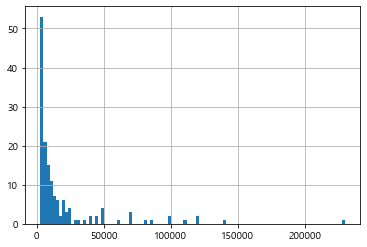

In [9]:
picher['연봉(2018)'].hist(bins=100)

<AxesSubplot:>

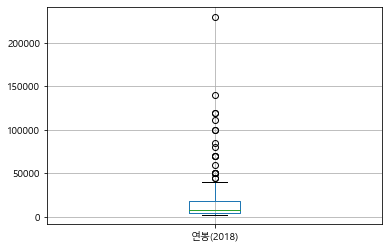

In [10]:
picher.boxplot(column=['연봉(2018)'])

- 수십억원대 연봉을 받는 프로선수는 많지 않으며, 5억원 미만의 연봉이 일반적임
- 기준을 넘어가는 값들이 일부 보임 (Q3+ (1.5* IQR))

-----

### [회귀 분석에 사용할 피처 살펴보기]
 - 선수명, 팀명과 같이 그래프로 표현할 수 없는 피처들을 제외하고, 모든 수치형 피처의 분포를 살펴보자
 - 피처들의 분포는 어떠한가? 균형 또는 불균형
 - 각 피처들의 단워는 같은가 다른가?

In [11]:
picher_features_df=picher[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2018)', '연봉(2017)']]

In [12]:
def plot_hist_each_column(df):
    plt.rcParams['figure.figsize']=[20, 16]
    fig=plt.figure(1)
    
    for i in range(len(df.columns)):
        ax=fig.add_subplot(5, 5, i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
    plt.show()

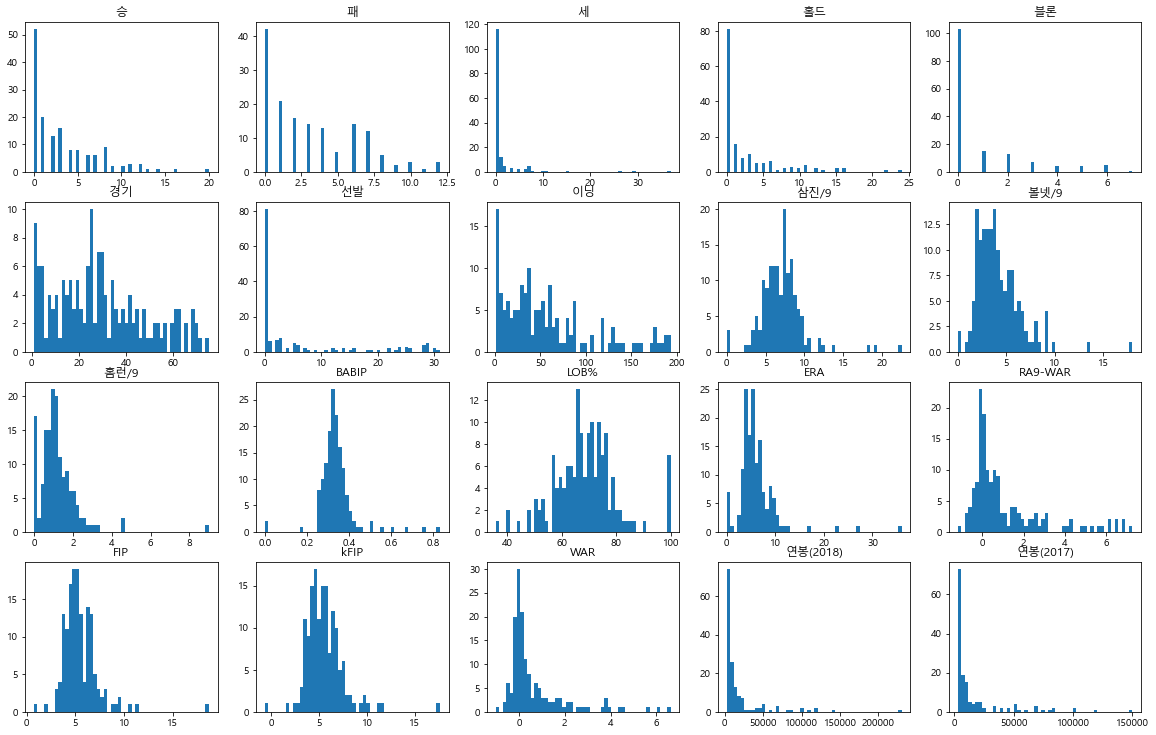

In [13]:
plot_hist_each_column(picher_features_df)

- 피처들은 균일하지 않음
- 각 피처들의 단위는 다름 (피처들의 단위가 다르다면 예측 모델에서 어떤 문제가 발생할까?)

-----

# <Step2. 예측> : 투수의 연봉 예측하기

### [피처들의 단위 맞춰주기 : 피처 스케일링]

In [14]:
pd.options.mode.chained_assignment=None

In [15]:
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean=df[col].mean()
        series_std=df[col].std()
        df[col]=df[col].apply(lambda x: (x-series_mean/series_std))
    return df

In [16]:
scale_columns=['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)']
picher_df=standard_scaling(picher, scale_columns)

In [17]:
picher_df=picher_df.rename(columns={'연봉(2018)':'y'})
picher_df.head(5)

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,SK,15.172446,5.991387,-0.306452,-0.585705,-0.543592,28.510767,29.375175,188.867661,...,-0.429625,-3.484542,67.788557,2.14894,6.336749,0.746812,0.6459,6.116356,140000,84999.341015
1,소사,LG,10.172446,9.991387,0.693548,-0.585705,-0.543592,28.510767,28.375175,183.967661,...,-0.659625,-3.507542,61.188557,2.42894,6.226749,0.576812,0.6159,5.576356,120000,49999.341015
2,양현종,KIA,19.172446,4.991387,-0.306452,-0.585705,-0.543592,29.510767,30.375175,191.967661,...,-0.399625,-3.494542,66.188557,1.98894,5.966749,0.996812,1.0259,5.136356,230000,149999.341015
3,차우찬,LG,9.172446,5.991387,-0.306452,-0.585705,-0.543592,26.510767,27.375175,174.067661,...,-0.169625,-3.528542,69.088557,1.97894,5.536749,1.256812,1.2359,4.126356,100000,99999.341015
4,레일리,롯데,12.172446,5.991387,-0.306452,-0.585705,-0.543592,28.510767,29.375175,185.967661,...,-0.279625,-3.503542,68.188557,2.34894,5.556749,1.416812,1.5159,3.876356,111000,84999.341015


-----

### [피처들의 단위 맞춰주기 : one-hot-encoding]

- 연속형이 아는 범주형 피처들은 어떻게 정규화할 수 있을까? (원-핫 인코딩)
- pandas에서는 get_dummies()라는 함수를 통해 원-핫 인코딩을 간단히 수행할 수 있음

In [18]:
team_encoding=pd.get_dummies(picher_df['팀명'])
picher_df=picher_df.drop('팀명', axis=1)
picher_df=picher_df.join(team_encoding)

In [19]:
team_encoding.head(5)

,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0


In [20]:
picher_df.head()

,선수명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,켈리,15.172446,5.991387,-0.306452,-0.585705,-0.543592,28.510767,29.375175,188.867661,6.456817,...,84999.341015,0,0,0,0,1,0,0,0,0
1,소사,10.172446,9.991387,0.693548,-0.585705,-0.543592,28.510767,28.375175,183.967661,4.936817,...,49999.341015,0,0,1,0,0,0,0,0,0
2,양현종,19.172446,4.991387,-0.306452,-0.585705,-0.543592,29.510767,30.375175,191.967661,4.866817,...,149999.341015,1,0,0,0,0,0,0,0,0
3,차우찬,9.172446,5.991387,-0.306452,-0.585705,-0.543592,26.510767,27.375175,174.067661,5.546817,...,99999.341015,0,0,1,0,0,0,0,0,0
4,레일리,12.172446,5.991387,-0.306452,-0.585705,-0.543592,28.510767,29.375175,185.967661,4.996817,...,84999.341015,0,0,0,0,0,0,1,0,0


-----

### [회귀 분석 적용하기]

##### 회귀 분석을 위한 학습, 테스트 데이터셋 분리
 - random_state: 
   : scikit learn에서 사용하는 random_state 인자는 수행시마다 동일한 결과를 얻기 위해 적용. train_test_split(..., test_size=0.2) 과 같은 함수는 80% train, 20% test 데이터 세트를 추출. 하지만 추출된 데이터는 수행을 할때마다 다를수 있음. 이는 random하게 80%, 20%를 추출하기 때문임. random_state=1 이라고 하면 바로 이 random 함수의 seed 값을 고정시키기 때문에 여러번 수행하더라도 같은 레코드를 추출함. random 함수의 seed값을 random_state라고 생각하면됨.

In [21]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

x=picher_df[picher_df.columns.difference(['선수명', 'y'])]
y=picher_df['y']
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=19)

##### 회귀 분석 계수 학습 & 학습된 계수 출력

In [22]:
lr=linear_model.LinearRegression()
model=lr.fit(x_train, y_train)

In [23]:
print(lr.coef_)

[-1.66433649e+04 -1.00005486e+02 -5.03120671e+04 -1.56086205e+03
  1.57200472e+03 -7.47049524e+02 -1.18666920e+02 -5.23546876e+02
  2.14736071e+03  8.98376390e+02  7.76920737e+03  3.91969663e+04
 -1.25668595e+02 -8.92118013e+02  4.49911172e+02  3.22164149e+03
  7.77935715e+02 -2.81055645e+03  1.90870829e+03 -4.92026373e+02
 -5.21324705e+01  6.10889234e+01  7.63803603e-01  1.69794484e+01
  4.15729514e+02  3.61384063e+03 -2.07081858e+02  1.78400390e+04]


In [24]:
picher_df.columns

Index(['선수명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9',
       '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', 'y',
       '연봉(2017)', 'KIA', 'KT', 'LG', 'NC', 'SK', '두산', '롯데', '삼성', '한화'],
      dtype='object')

-----

# <Step3. 평가> : 예측 모델 평가하기

### [어떤 피처가 가장 영향력이 강한 피처일까]
 - statsmodel이라는 라이브러리를 이용해보자

In [25]:
!pip install statsmodels

In [26]:
import statsmodels.api as sm

x_train=sm.add_constant(x_train)
model=sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     44.19
Date:                Tue, 22 Nov 2022   Prob (F-statistic):           7.70e-42
Time:                        20:28:45   Log-Likelihood:                -1247.8
No. Observations:                 121   AIC:                             2552.
Df Residuals:                      93   BIC:                             2630.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.365e+04   4.89e+04     -0.688      0.493   -1.31e+05    6.34e+04
BABIP      -1.664e+04   1.45e+04     -1.145      0.255   -4.55e+04    1.22e+04
ERA         -100.0055    557.379     -0.179      0.858   -1206.850    1006.839
FIP        -5.031e+04   5.04e+04     -0.998      0.321    -1.5e+05    4.98e+04
KIA        -5299.6626   5674.262     -0.934      0.353   -1.66e+04    5968.298
KT         -2166.7958   5714.434     -0.379      0.705   -1.35e+04    9180.938
LG         -4485.8500   5822.759     -0.770      0.443    -1.6e+04    7076.995
LOB%        -118.6669    134.995     -0.879      0.382    -386.740     149.406
NC         -4262.3474   6364.840     -0.670      0.505   -1.69e+04    8376.963
RA9-WAR     2147.3607   1589.996      1.351      0.180   -1010.055    5304.777
SK         -2840.4241   5762.549     -0.493      0.623   -1.43e+04    8602.856
WAR         7769.2074   1915.216      4.057      0.000    3965.967    1.16e+04
kFIP         3.92e+04   4.01e+04      0.977      0.331   -4.05e+04    1.19e+05
경기          -125.6686    152.468     -0.824      0.412    -428.439     177.102
두산         -4630.9185   6208.998     -0.746      0.458    -1.7e+04    7698.921
롯데         -3288.8893   6213.150     -0.529      0.598   -1.56e+04    9049.194
볼넷/9        3221.6415   2655.869      1.213      0.228   -2052.388    8495.671
블론           777.9357    760.237      1.023      0.309    -731.745    2287.616
삼성         -6549.3570   5907.837     -1.109      0.270   -1.83e+04    5182.437
삼진/9        1908.7083   2576.865      0.741      0.461   -3208.435    7025.852
선발          -492.0264    563.005     -0.874      0.384   -1610.043     625.990
세            -52.1325    269.373     -0.194      0.847    -587.054     482.789
승             61.0889    573.363      0.107      0.915   -1077.496    1199.673
연봉(2017)       0.7638      0.051     15.055      0.000       0.663       0.865
이닝            16.9794    131.695      0.129      0.898    -244.540     278.499
패            415.7295    618.326      0.672      0.503    -812.143    1643.602
한화          -124.9599   5698.286     -0.022      0.983   -1.14e+04    1.12e+04
홀드          -207.0819    362.736     -0.571      0.569    -927.403     513.239
홈런/9        1.784e+04   1.65e+04      1.082      0.282   -1.49e+04    5.06e+04
==============================================================================
Omnibus:                       28.069   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.274
Skew:                          -0.405   Prob(JB):                     6.52e-43
Kurtosis:                       9.155   Cond. No.                     2.38e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

- statmodel에서 OLS(Ordinary Least Squares(최소자승법/최소제곱법) regression)은 linear regression과 동일
- 결정계수(R-Score), 수정결정계수(Adj. R-Square)의 값을 잘 살펴볼 필요가 있음
  (이는 회귀분석이 얼마나 잘되었는지 평가하는 지표이며, "회귀 분석으로 추정한 모델이 주어진 데이터를 얼마나 잘 설명하는가?"에 대한 점수임) --> 1에 가까울 수록 데이터를 잘 설명하는 모델 (오차가 적은 모델)
- F-statistic(F 통계량): 회귀식의 유의성 검정에 사용되는 값 (Prob(F-statisitic): F 통계량의 p-value: 일반적으로 0.05이하면 F통계량이 유의한 의미를 가짐
- P>|t|: 각 피처의 검정 통계량(t-statistics)의 p-value (마찬가지로 0.05 이하일 때 유의미한 의미를 가짐)
  (WAR, 연봉(2017), 한화 3개의 피처가 0.05로 나타남)

[Text(0, 0, 'const'),
 Text(1, 0, 'BABIP'),
 Text(2, 0, 'ERA'),
 Text(3, 0, 'FIP'),
 Text(4, 0, 'KIA'),
 Text(5, 0, 'KT'),
 Text(6, 0, 'LG'),
 Text(7, 0, 'LOB%'),
 Text(8, 0, 'NC'),
 Text(9, 0, 'RA9-WAR'),
 Text(10, 0, 'SK'),
 Text(11, 0, 'WAR'),
 Text(12, 0, 'kFIP'),
 Text(13, 0, '경기'),
 Text(14, 0, '두산'),
 Text(15, 0, '롯데'),
 Text(16, 0, '볼넷/9'),
 Text(17, 0, '블론'),
 Text(18, 0, '삼성'),
 Text(19, 0, '삼진/9'),
 Text(20, 0, '선발'),
 Text(21, 0, '세'),
 Text(22, 0, '승'),
 Text(23, 0, '연봉(2017)'),
 Text(24, 0, '이닝'),
 Text(25, 0, '패'),
 Text(26, 0, '한화'),
 Text(27, 0, '홀드'),
 Text(28, 0, '홈런/9')]

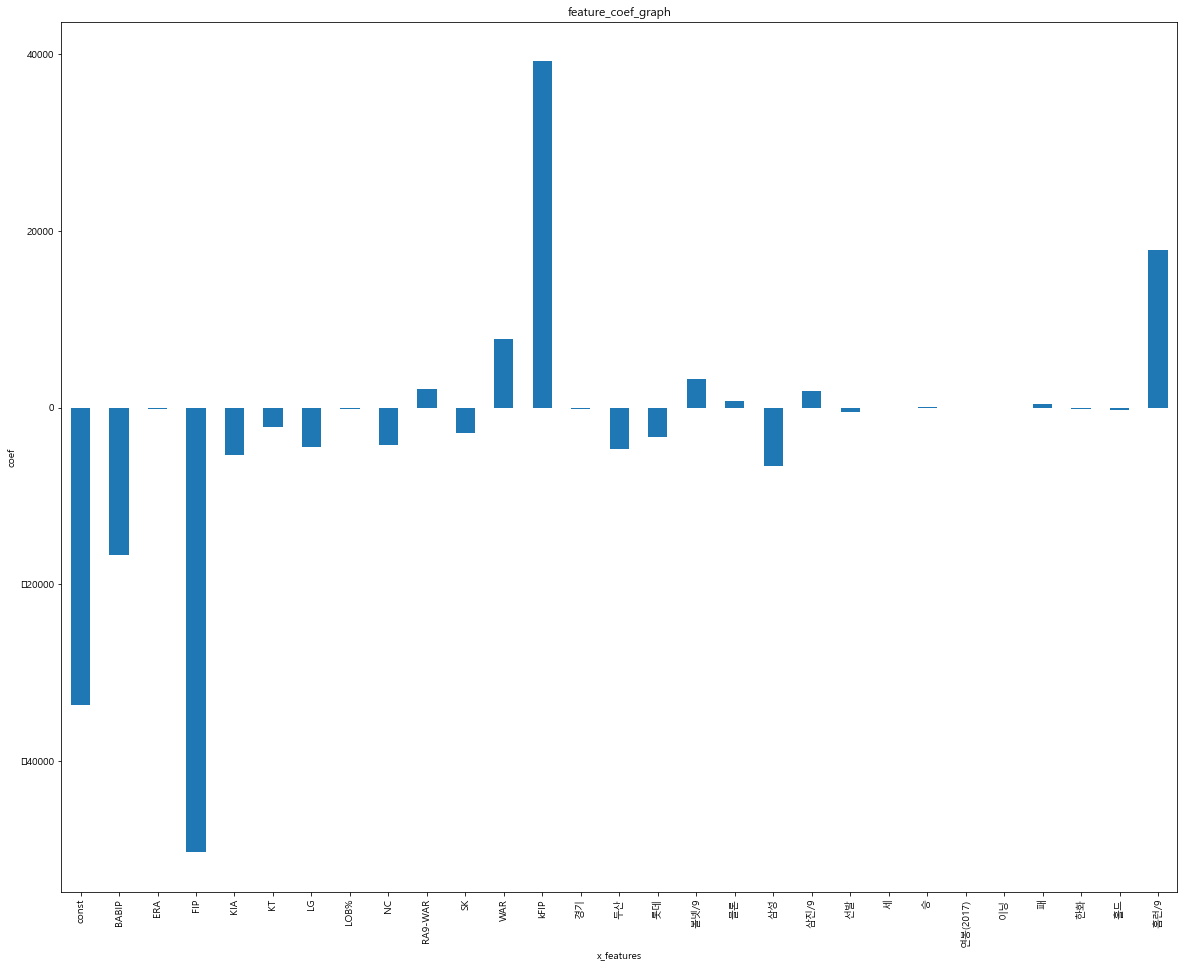

In [27]:
mpl.rc('font', family='Malgun Gothic')
plt.rcParams['figure.figsize']=[20, 16]

coefs=model.params.tolist()
coefs_series=pd.Series(coefs)

x_labels=model.params.index.tolist()

ax=coefs_series.plot(kind='bar')
ax.set_title("feature_coef_graph")
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

- 길게 나온것은 영향력인 큰 feature임. 영향력이 크다고 유의미한 feature는 아닐 수 있음
  (유의미: p-value가 0.05이하인 것)

-----

### [예측 모델의 평가]

In [28]:
x=picher_df[picher_df.columns.difference(['선수명', 'y'])]
y=picher_df['y']
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=1)

In [29]:
lr=linear_model.LinearRegression()
model=lr.fit(x_train, y_train)

##### R2 score

In [30]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.938278496963353
0.6606779856811531


##### RMSE score

In [31]:
y_predictions = lr.predict(x_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) 
y_predictions = lr.predict(x_test)
print(sqrt(mean_squared_error(y_test, y_predictions)))

8249.144607663542
10348.84879716248


-----

### `[미니 퀴즈 - 3.1]`
- `Train score, 그리고 Test score의 차이점은 무엇일까요? 그리고 어떤 점수가 더 높아야 할까요?` 
    - 훈련 데이터셋을 통해 계산한 점수와 테스트 데이터셋을 통해 계산한 점수간에는 어떤 차이가 있는 것인지 적어 봅시다. 그리고 이 두 점수의 차이가 크다면, 어떤 상황을 의미하는 것인지 생각해 봅시다.
        - `대답 예시` : 훈련 데이터셋은 오로지 모델을 학습하고, 비용함수(오차함수)를 평가하는데 사용됩니다. 반면, 테스트 데이터셋은 모델에 영향을 미치지 않습니다. 결과를 예측하기 위한 입력데이터로만 활용됩니다. 가장 이상적인 경우는 Train score, Test score가 차이가 없는 것입니다. 이 차이가 벌어질수록 모델이 훈련 데이터셋에 과적합된 것입니다. 일반적으로는 Train score가 약간 더 높습니다.

-----

### [피처들의 상관관계 분석]

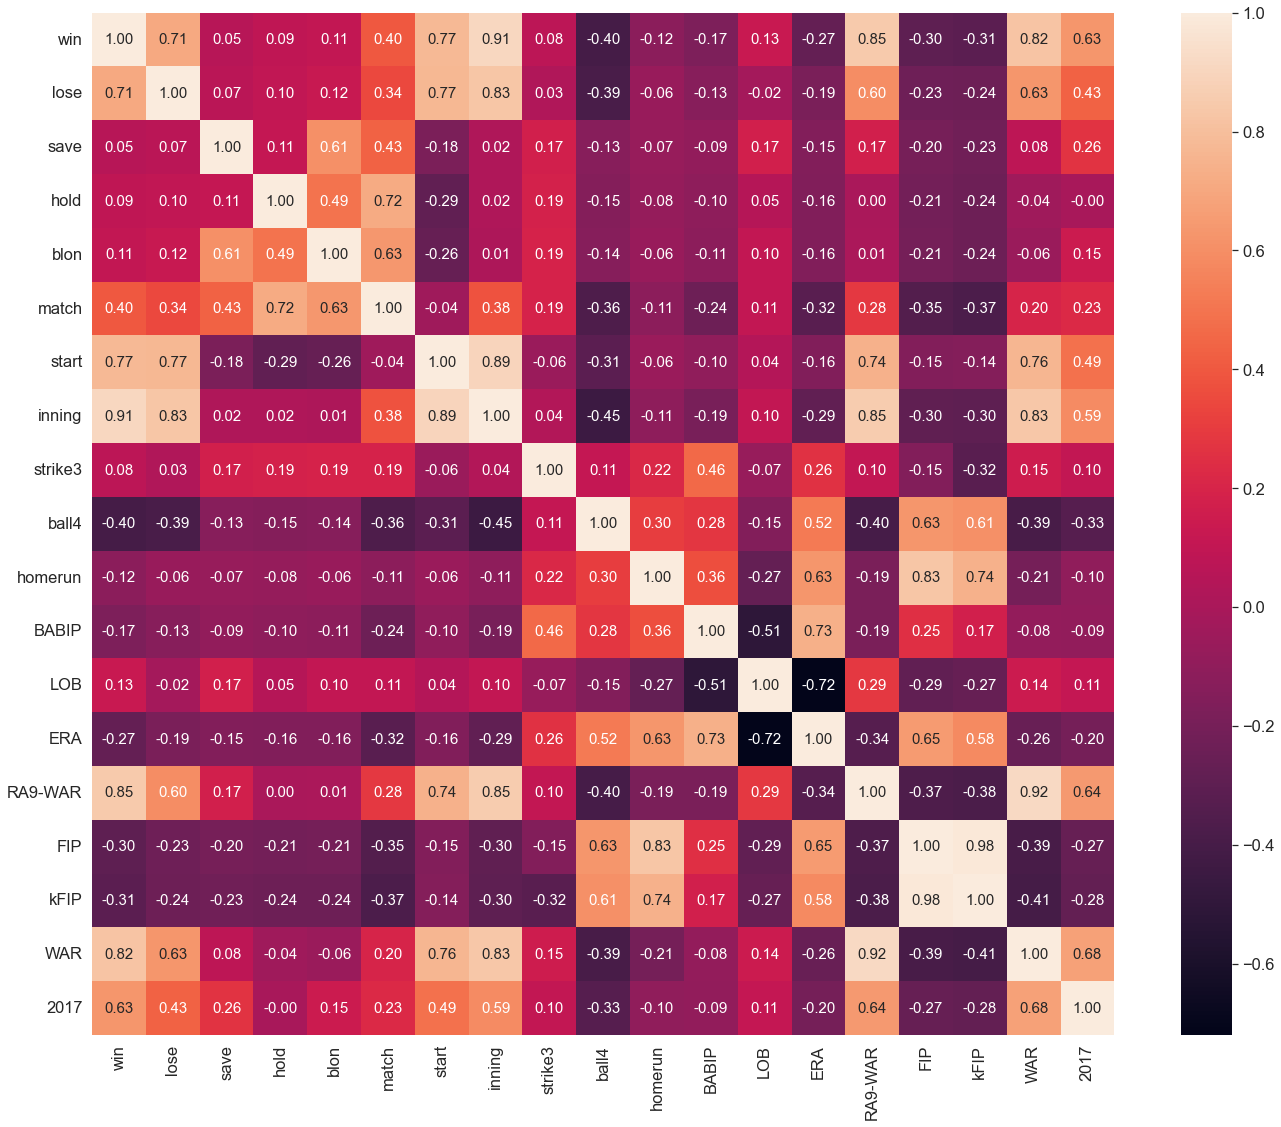

In [33]:
import seaborn as sns

corr = picher_df[scale_columns].corr(method='pearson')
show_cols = ['win', 'lose', 'save', 'hold', 'blon', 'match', 'start', 'inning', 'strike3', 'ball4', 'homerun', 'BABIP', 'LOB', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '2017']

plt.rc('font', family='NanumGothicOTF')
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=show_cols, xticklabels=show_cols)

plt.tight_layout()
plt.show()

- 승-이닝, kfip-fip, RA9_WAR-WAR 간의 높은 연관성 발견

-----

### [회귀분석 예측 성능을 높이기 위한 방법 : 다중공선성 확인]

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

- 다중공선성: 회귀분석은 피처간의 독립성을 전제로하는 분석방법임. 상관관계가 높은 피처들을 제거(부정적 영향)
- VIF(variance inflation fator: 분산팽창요인): VIF 계수가 10-15를 넘으면 다중공선성 문제 발생

In [35]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.round(1)

,VIF Factor,features
0,3.2,BABIP
1,10.6,ERA
2,14238.3,FIP
3,566.2,KIA
4,719.8,KT
5,684.2,LG
6,4.3,LOB%
7,499.5,NC
8,13.6,RA9-WAR
9,682.3,SK


-----

### `[미니 퀴즈 - 3.2]`
- `적절한 피처를 선정하여 다시 학습해 보세요.` 
    - 사용할 피처를 다시 고른 뒤, 다시 학습을 진행했을 때의 Train score, Test score가 어떻게 향상되는지 살펴봅니다.
        - 아래의 과정을 거쳐 ['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)'] 피처를 선정했을 때, 더욱 좋은 결과를 나타냈습니다.
            - 선정 과정
                - 1. VIF 계수가 높은 피처들을 우선적으로 제거합니다. 단, (FIP, kFIP)와 같이 유사한 두가지 피처중에는 하나만을 제거합니다.
                - 2. 다시 공선성을 검증합니다. 이전 단계에서는 VIF 계수가 높았던 볼넷, 삼진 등의 피처의 VIF 계수가 낮아진 것을 확인할 수 있습니다. VIF 계수가 비정상적으로 높은 피처를 제거해주면, 다른 피처들의 공선성도 자연스레 감소하기 때문입니다.
                - 3. 여전히 VIF 계수가 높은 피처들을 제거합니다.
                - 4. 남은 피처를 토대로 다시한번 회귀분석을 실시합니다. 분석 결과에서 p-value가 유의하면서도 영향력이 큰 피처들을 선정합니다.
            - train_score, test_score를 비교했을 때, 기존보다 overfit이 비교적 덜 된것으로 보입니다
            - test rmse 역시 감소한 것을 볼 수 있습니다.

### [적절한 피처로 다시 학습하기]

In [36]:
x = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
y = picher_df['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=19)

In [37]:
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)

In [38]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9150591192570362
0.9038759653888478


In [39]:
y_predictions = lr.predict(x_train)
print(sqrt(mean_squared_error(y_train, y_predictions)))
y_predictions = lr.predict(x_test)
print(sqrt(mean_squared_error(y_test, y_predictions)))

7893.462873347692
13141.866063600564


In [41]:
x = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.round(1)

,VIF Factor,features
0,3.8,FIP
1,2.1,WAR
2,3.9,볼넷/9
3,2.4,삼진/9
4,2.5,연봉(2017)


-----

# <Step4. 시각화> : 분석 결과의 시각화

### [예상 연봉과 실제 연봉 비교]

In [42]:
x = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
predict_2018_salary = lr.predict(x)
picher_df['예측연봉(2018)'] = pd.Series(predict_2018_salary)

In [43]:
picher = pd.read_csv(picher_file_path)
picher = picher[['선수명', '연봉(2017)']]

result_df = picher_df.sort_values(by=['y'], ascending=False)
result_df.drop(['연봉(2017)'], axis=1, inplace=True, errors='ignore')
result_df = result_df.merge(picher, on=['선수명'], how='left')
result_df = result_df[['선수명', 'y', '예측연봉(2018)', '연봉(2017)']]
result_df.columns = ['선수명', '실제연봉(2018)', '예측연봉(2018)', '작년연봉(2017)']

result_df = result_df[result_df['작년연봉(2017)'] != result_df['실제연봉(2018)']]
result_df = result_df.reset_index()
result_df = result_df.iloc[:10, :]
result_df.head(10)

,index,선수명,실제연봉(2018),예측연봉(2018),작년연봉(2017)
0,0,양현종,230000,163930.148695,150000
1,1,켈리,140000,120122.822204,85000
2,2,소사,120000,88127.019455,50000
3,4,레일리,111000,102253.697589,85000
4,7,피어밴드,85000,58975.725734,35000
5,13,배영수,50000,56873.662417,55000
6,21,안영명,35000,22420.790838,20000
7,22,채병용,30000,21178.955105,25000
8,23,류제국,29000,45122.360087,35000
9,24,박정진,25000,29060.748299,33000


<AxesSubplot:xlabel='선수명'>

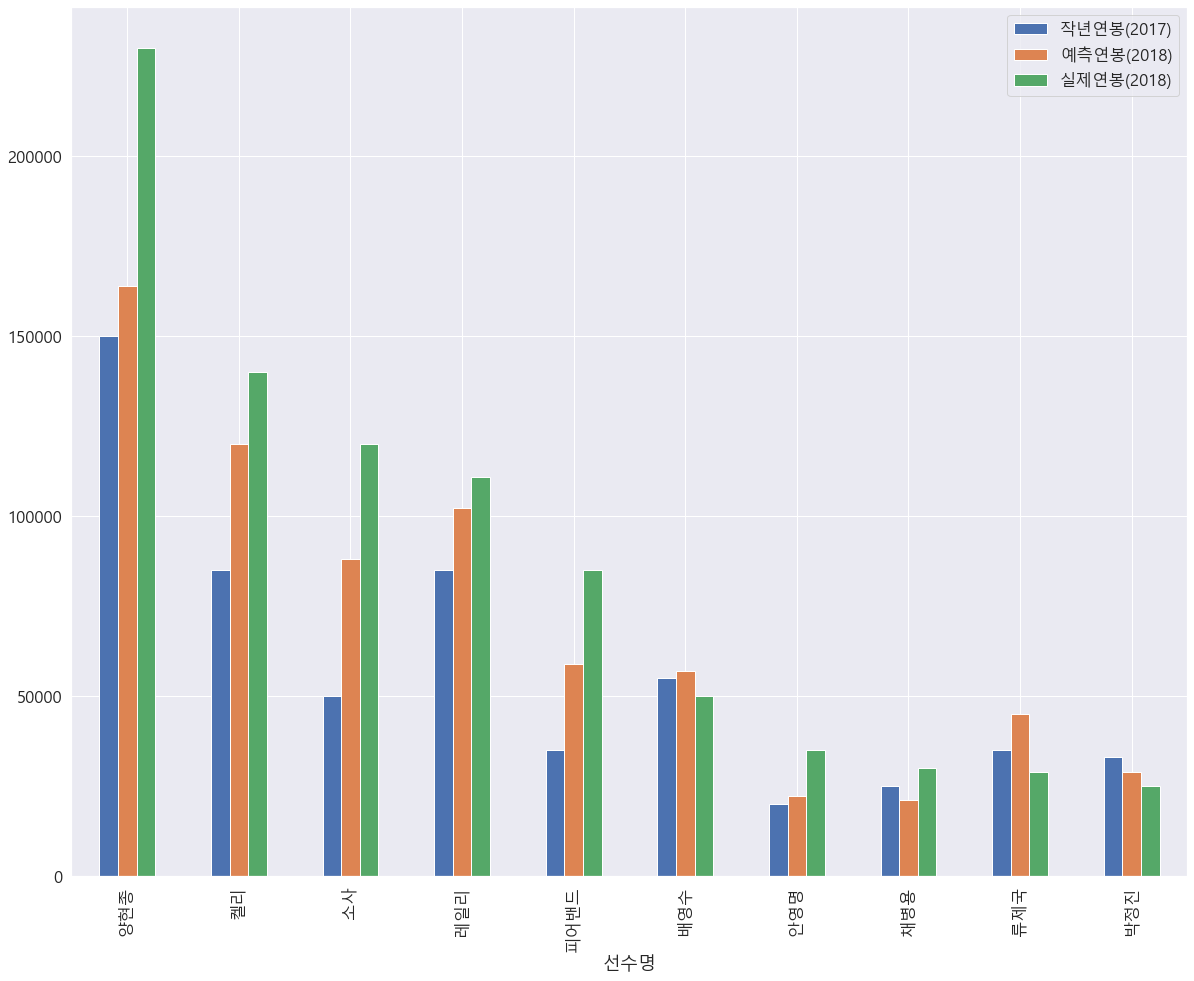

In [44]:
mpl.rc('font', family='Malgun Gothic')
result_df.plot(x='선수명', y=['작년연봉(2017)', '예측연봉(2018)', '실제연봉(2018)'], kind="bar")